**HapPyWorld**


**Contexte :**

Le World Happiness Report est une étude de données, publiée chaque année, aboutissant à une mesure du bonheur s’évaluant à l’aide de différents critères socio-économiques. Le “Ladder score” représente ici le score global de bonheur par pays et s’obtient par la somme des différentes variables “Explained by” à laquelle s’additionne la variable “Dystopia + Residual”. Plusieurs variables composent donc le score global de bonheur dont le PIB par habitant, l’aide sociale, l’espérance de vie, la liberté de choix, la générosité et la perception de la corruption.

Nous allons durant ce projet, déterminer les combinaisons de facteurs qui permettent d’expliquer pourquoi certains pays, voire certaines régions du monde, sont mieux classé(e)s que d’autres.

**Dataset :**

L’ensemble de données est constitué de deux dataset : l’un portant sur l’étude du bonheur de l’année 2021, le second sur cette même étude de 2005 à 2020.
Nous faisons dans un premier temps un focus uniquement sur ce premier dataset, plus récent.
Sur celui-ci aucune modification n’a été apportée, ce dataset ne comportant ni valeur manquante ni aberrante.

**Visualisation :**

Nous avons souhaité construire plusieurs visualisations, à l’aide de graphiques, qui nous semblent intéressantes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/world-happiness-report-2021.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/world-happiness-report.csv')
df2.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
#Création liste des régions du monde par pays
country_region = df.iloc[:,0:2]

#Mise en forme des 2 datasets en prévision du concat
#dataset de 2021 :
df_1 = df.iloc[:,:12]
df_1 = df_1.drop(df.iloc[:,3:6], axis=1)
df_1 = df_1.drop('Regional indicator', axis=1)
df_1['year']='2021'

#dataset historique depuis 2005 :
df_2 = df2.iloc[:, :-2]
dico = {'Life Ladder' : 'Ladder score', 'Log GDP per capita' : 'Logged GDP per capita', 'Healthy life expectancy at birth' : 'Healthy life expectancy'}
df_2.rename(dico, axis=1, inplace=True)

#création du fichier contenants les données depuis 2005 :
df_full = pd.concat([df_1, df_2], axis=0)
df_full['year'] = df_full['year'].astype('int')
df_full = df_full.sort_values(by='Country name', ascending=True)

#ajout colonne Region d'après le df country_region créé précédemment :
df_full = df_full.merge(country_region, on = 'Country name', how ='inner')

#ajout du rank par année de chaque pays
df_full["rank"] = df_full.groupby("year")["Ladder score"].rank("dense", ascending=False).astype('int')


DataFrame 1 : Données 2021

In [ ]:
#Ajout rank dataframe de 2021
df['rank'] = df['Ladder score'].rank(ascending=False).astype('int')

#retire les colonnes non pertinentes
data_explained = df.drop(df.iloc[:,3:13], axis=1)

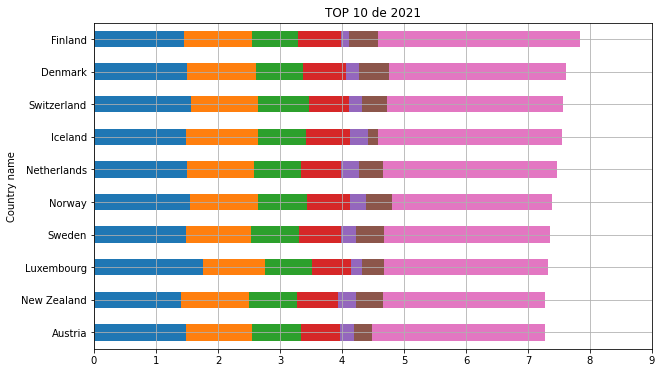

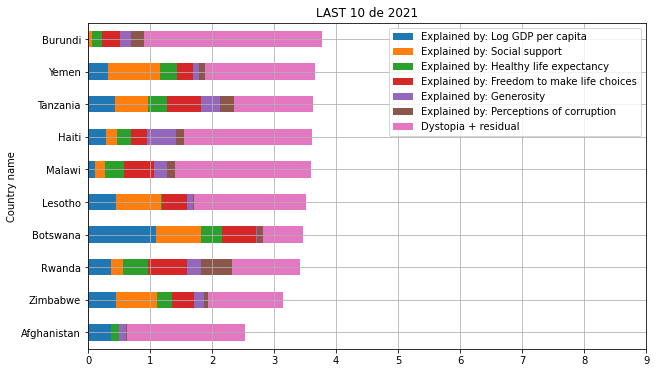

In [ ]:
#Histogrammes horizontaux par pays (Note et répartition des variables) du Top 10 et Last 10

col_var = ['Explained by: Log GDP per capita',
                                  'Explained by: Social support', 
                                  'Explained by: Healthy life expectancy', 
                                  'Explained by: Freedom to make life choices', 
                                  'Explained by: Generosity', 
                                  'Explained by: Perceptions of corruption',
                                  'Dystopia + residual']

data_top10 = data_explained.sort_values(by='rank', ascending=False).tail(10)
data_last10 = data_explained.sort_values(by='rank', ascending=False).head(10)

ax1 = data_top10.plot.barh(x = 'Country name', 
                              y = col_var,
                               stacked = True,
                               figsize = (10,6),
                               grid = True,
                               xticks = range(0,10),
                               title = 'TOP 10 de 2021',
                               legend = False
                          );

ax2 = data_last10.plot.barh(x = 'Country name', 
                              y = col_var,
                               stacked = True,
                               figsize = (10,6),
                               grid = True,
                               xticks = range(0,10),
                               title = "LAST 10 de 2021")
ax2.legend(bbox_to_anchor=(1.0, 1.0));


Nous avons souhaité avoir une idée précise du poids de chaque variable qui compose le score de bonheur parmi les 10 premiers et 10 derniers pays du classement via deux barplot empilés.

Mise à part la variable “Dystopia + residual” qui additionne la comparaison du pays versus Dystopia (≠ Utopia, un pays imaginaire où le bonheur est nul) et les composantes inexpliquées, nous pouvons apercevoir, pour les 10 premiers pays, que le critère le plus important pour “être heureux” est le PIB/habitant, suivi par l’aide sociale, l’espérance de vie et la liberté de choix. Enfin, dans une moindre mesure, interviennent la générosité et la perception de la corruption.

Pour les 10 pays les moins bien classés, la variable PIB/habitant est la plus importante pour seulement deux d'entre eux. L'aide sociale est la plus importante pour trois pays et la liberté de choix pour quatre, ce qui marque une rupture de vision du bonheur entre habitants de pays au Ladder score élevé et bas.


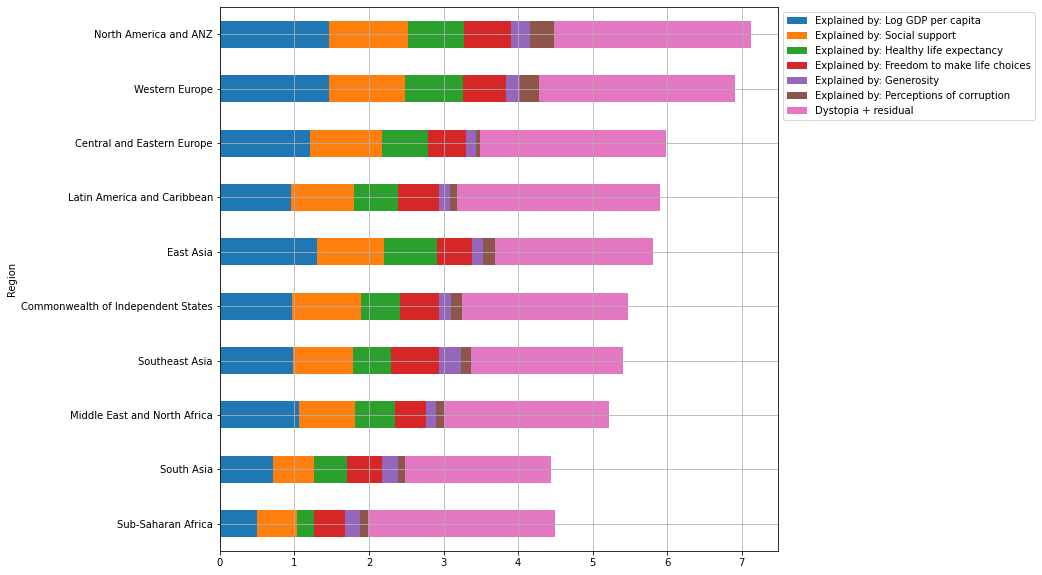

In [ ]:
#Moyenne des notes par Région du monde

data_1 = data_explained.groupby('Regional indicator').mean()
data_1['Region'] = data_1.index

data_1 = data_1.sort_values(by='rank', ascending=False).tail(15)

ax = data_1.plot.barh(x = 'Region', 
                              y = ['Explained by: Log GDP per capita',
                                  'Explained by: Social support', 
                                  'Explained by: Healthy life expectancy', 
                                  'Explained by: Freedom to make life choices', 
                                  'Explained by: Generosity', 
                                  'Explained by: Perceptions of corruption',
                                  'Dystopia + residual'],
                               stacked = True,
                               figsize = (10,10),
                               grid = True,
                            )

ax.legend(bbox_to_anchor=(1.0, 1.0));


Ici, nous souhaitions connaître le classement des régions du monde les plus heureuses ainsi que le poids des variables composant le Ladder score grâce à la moyenne des notes des pays appartenant à chacune d’elles.

Les trois régions du monde où le Ladder score est le plus élevé sont l’Amérique du nord + Australie + Nouvelle-Zélande, l’Europe de l’ouest puis l’Europe centrale et du sud. A l’inverse, celles où il est le plus bas sont le Moyen-Orient + Afrique du nord, l’Asie du sud et enfin l’Afrique Subsaharienne.

Pour les régions du monde détenant un Ladder score élevé, le PIB/habitant est la variable la plus élevée, suivie par l’aide sociale et l’espérance de vie. Pour celles ayant un Ladder score bas, le PIB/habitant reste la variable majeure mais dans une bien moindre mesure, souvent à égalité avec l’aide sociale et la liberté de choix.

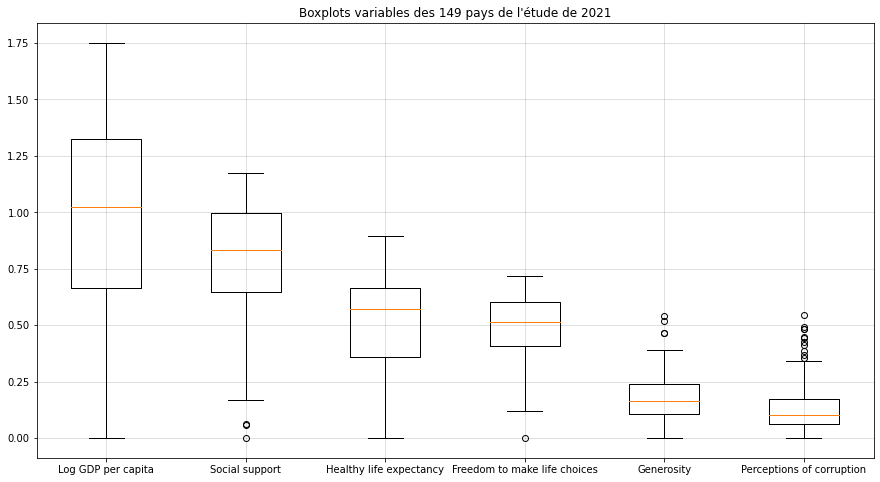

In [ ]:

plt.figure(figsize=(15, 8))

plt.boxplot([df['Explained by: Log GDP per capita'], df['Explained by: Social support'], df['Explained by: Healthy life expectancy'], df['Explained by: Freedom to make life choices'], df['Explained by: Generosity'], df['Explained by: Perceptions of corruption']], labels=['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption' ])
plt.grid(alpha=0.5)
plt.title("Boxplots variables des 149 pays de l'étude de 2021");


Nous avons utilisé un boxplot pour réaliser une analyse descriptive de données continues afin de visualiser la dispersion des différentes variables qui composent le Ladder score pour les 149 pays du dataset. La dispersion du PIB/habitant est de loin la plus grande, suivie par l’aide sociale et l’espérance de vie. A l’inverse, la générosité et la perception de la corruption semblent être deux variables où cette dispersion est beaucoup moins marquée mais où il existe de nombreuses valeurs extrêmes (outliers).

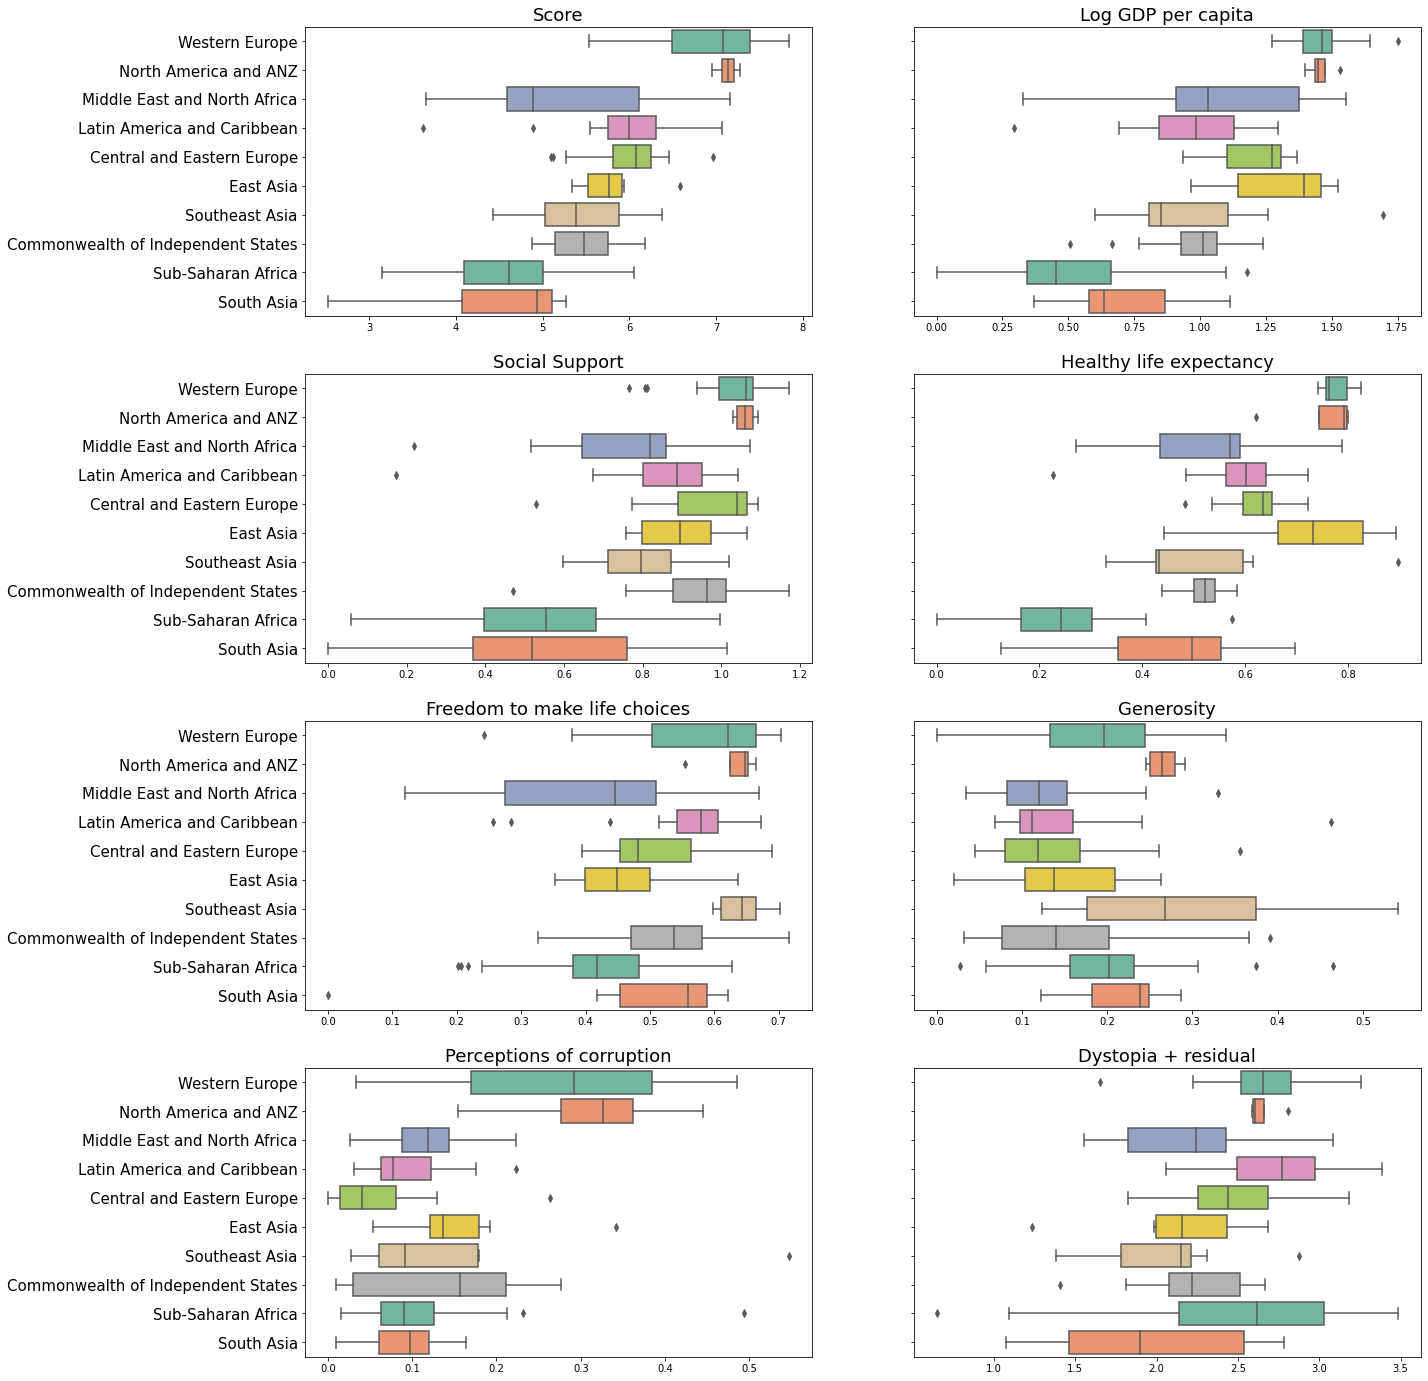

In [ ]:
# Boxplots des variables par Région du monde pour 2021

plt.figure(figsize=(20,50))

plt.subplot(8,2,1)
ax = sns.boxplot(x='Ladder score', y='Regional indicator', orient='h', data=data_explained, palette='Set2')
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 15)
ax.set_title('Score', fontsize = 18)
ax.set(xlabel = None, ylabel = None)

plt.subplot(8,2,2)
ax = sns.boxplot(x='Explained by: Log GDP per capita', y='Regional indicator', data=data_explained, orient='h', palette='Set2')
ax.set(yticklabels = [])
ax.set(xlabel = None, ylabel = None)
ax.set_title('Log GDP per capita', fontsize = 18)

plt.subplot(8,2,3)
ax = sns.boxplot(x='Explained by: Social support', y='Regional indicator', data=data_explained, orient='h', palette='Set2')
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 15)
ax.set(xlabel = None, ylabel = None)
ax.set_title('Social Support', fontsize = 18)

plt.subplot(8,2,4)
ax = sns.boxplot(x='Explained by: Healthy life expectancy', y='Regional indicator', data=data_explained, orient='h', palette='Set2')
ax.set(yticklabels = [])
ax.set(xlabel = None, ylabel = None)
ax.set_title('Healthy life expectancy', fontsize = 18)

plt.subplot(8,2,5)
ax = sns.boxplot(x='Explained by: Freedom to make life choices', y='Regional indicator', data=data_explained, orient='h', palette='Set2')
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 15)
ax.set(xlabel = None, ylabel = None)
ax.set_title('Freedom to make life choices', fontsize = 18)

plt.subplot(8,2,6)
ax = sns.boxplot(x='Explained by: Generosity', y='Regional indicator', data=data_explained, orient='h', palette='Set2')
ax.set(yticklabels = [])
ax.set(xlabel = None, ylabel = None)
ax.set_title('Generosity', fontsize = 18)

plt.subplot(8,2,7)
ax = sns.boxplot(x='Explained by: Perceptions of corruption', y='Regional indicator', data=data_explained, orient='h', palette='Set2')
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 15)
ax.set(xlabel = None, ylabel = None)
ax.set_title('Perceptions of corruption', fontsize = 18)

plt.subplot(8,2,8)
ax = sns.boxplot(x='Dystopia + residual', y='Regional indicator', data=data_explained, orient='h', palette='Set2')
ax.set(yticklabels = [])
ax.set(xlabel = None, ylabel = None)
ax.set_title('Dystopia + residual', fontsize = 18);

Cet ensemble de graphiques nous montre l’étendue des variables constitutives du bonheur par région du monde. L’Amérique du nord + Australie + Nouvelle-Zélande représente la région ayant la plus faible étendue sur l’ensemble des graphiques. Ceci s’explique par le faible nombre de pays présents au sein de la région : 4. A l’inverse, la région composée par le plus grand nombre de pays est l’Afrique Subsaharienne avec 36 pays et presque logiquement, son étendue pour chaque variable est très importante.

In [ ]:
#code affichant le détail d'un pays : 

pays = 'France' #mettre ici le pays recherché

data_exp_pays = data_explained[(data_explained['Country name'] == pays)]

data_exp_pays

,Country name,Regional indicator,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,rank
20,France,Western Europe,6.69,1.421,1.081,0.804,0.536,0.092,0.235,2.521,21


In [ ]:
#Moyennes par région du monde
group_region_mean = df.groupby(by='Regional indicator').mean()

group_region_mean.sort_values(by='Ladder score', ascending=False)


,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,rank
Regional indicator,,,,,,,,,,,,,,,,,,,
North America and ANZ,7.128500,0.043000,7.213000,7.044250,10.809500,0.933500,72.325000,0.898750,0.120000,0.449250,2.43,1.458250,1.061000,0.751250,0.628500,0.266250,0.312750,2.650500,13.250000
Western Europe,6.914905,0.040667,6.994571,6.835190,10.822714,0.914476,73.033095,0.858714,-0.003190,0.523095,2.43,1.462905,1.018000,0.773476,0.580429,0.185905,0.265524,2.628762,21.333333
Central and Eastern Europe,5.984765,0.048471,6.079941,5.889529,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529,2.43,1.213588,0.957235,0.625529,0.505353,0.136353,0.056588,2.490000,53.235294
Latin America and Caribbean,5.908050,0.073900,6.052800,5.763150,9.370000,0.839500,67.076050,0.831750,-0.067700,0.792600,2.43,0.955400,0.848900,0.585800,0.547550,0.143700,0.093650,2.733000,56.650000
East Asia,5.810333,0.040000,5.889500,5.731667,10.367667,0.860500,71.252167,0.763500,-0.062333,0.683333,2.43,1.304000,0.896667,0.717333,0.464667,0.147333,0.163000,2.117833,62.000000
Commonwealth of Independent States,5.467000,0.046750,5.558417,5.375250,9.401833,0.872500,65.009500,0.816917,-0.036000,0.725083,2.43,0.966500,0.923500,0.520583,0.529500,0.164583,0.136667,2.225750,78.250000
Southeast Asia,5.407556,0.050000,5.505556,5.309444,9.421444,0.820333,64.888444,0.909000,0.156333,0.709111,2.43,0.973556,0.805667,0.516889,0.641444,0.289889,0.146667,2.033444,81.000000
Middle East and North Africa,5.219765,0.057000,5.331176,5.108059,9.666118,0.797647,65.609118,0.716471,-0.079765,0.762235,2.43,1.058882,0.754588,0.539529,0.407353,0.135765,0.113000,2.210588,90.000000
Sub-Saharan Africa,4.494472,0.078333,4.648250,4.340889,8.075194,0.696750,55.886472,0.723194,0.013444,0.765944,2.43,0.503111,0.527611,0.233333,0.415500,0.196694,0.110583,2.507722,118.472222


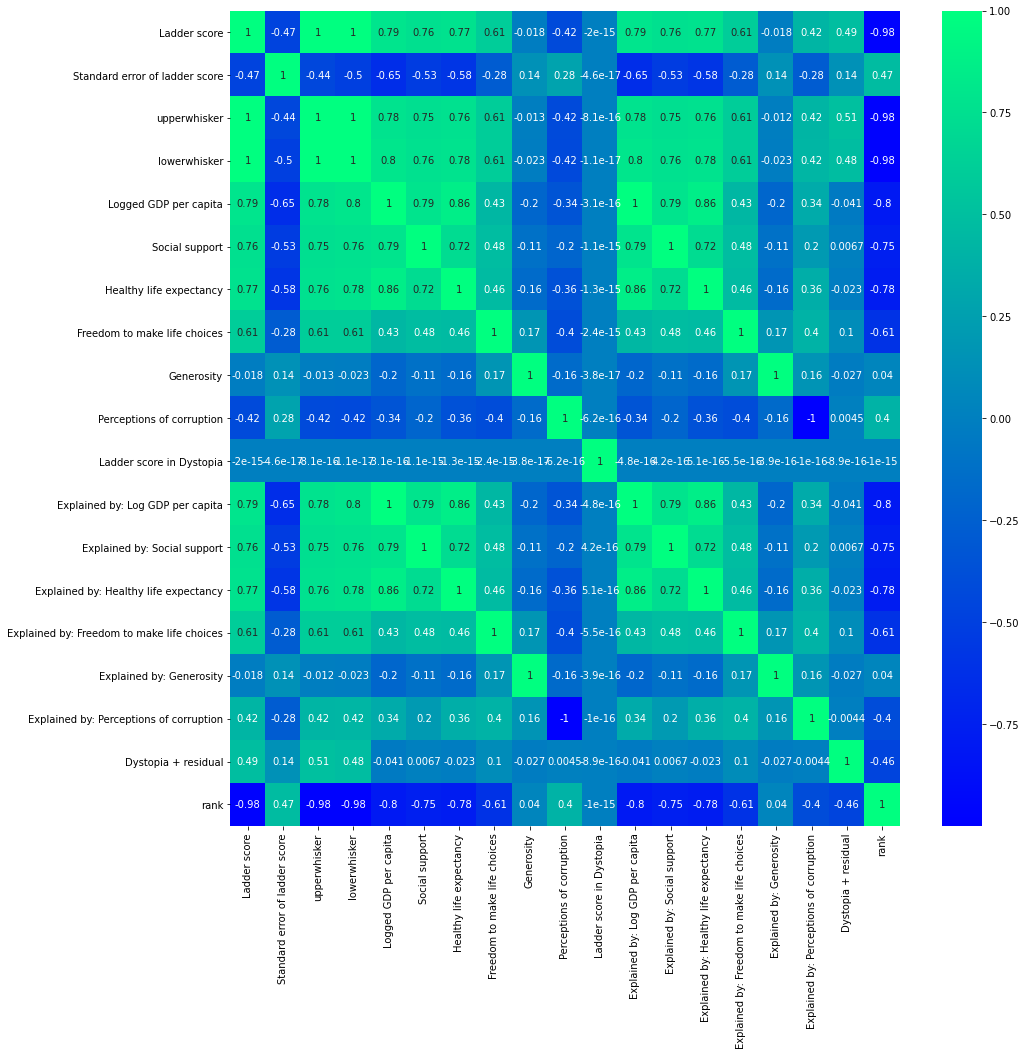

In [ ]:
#heatmap général des corrélations entre variables

plt.figure(figsize=(15,15))
num_var = df.drop(['Country name',"Regional indicator"], axis= 1)
sns.heatmap(data = num_var.corr(), annot=True, cmap ="winter");

Cette heatmap nous indique que les variables, notamment le PIB/habitant, ont la même corrélation avec le Ladder score que les variables transformées comme la variable "Explained by: Log GDP per capita". Nous pouvons donc supprimer l'ensemble des variables commençant par "Explained by:" de notre Dataset pour pouvoir optimiser les traitements.
De même, cette matrice nous confirme que les trois variables les plus corrélées avec le Ladder score sont le PIB/habitant, l'aide sociale et l'espérance de vie. Cependant, ces variables sont fortement corrélées entre elles également, elles ne sont donc probablement pas indépendantes.


In [ ]:
df.columns



Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'rank'],
      dtype='object')

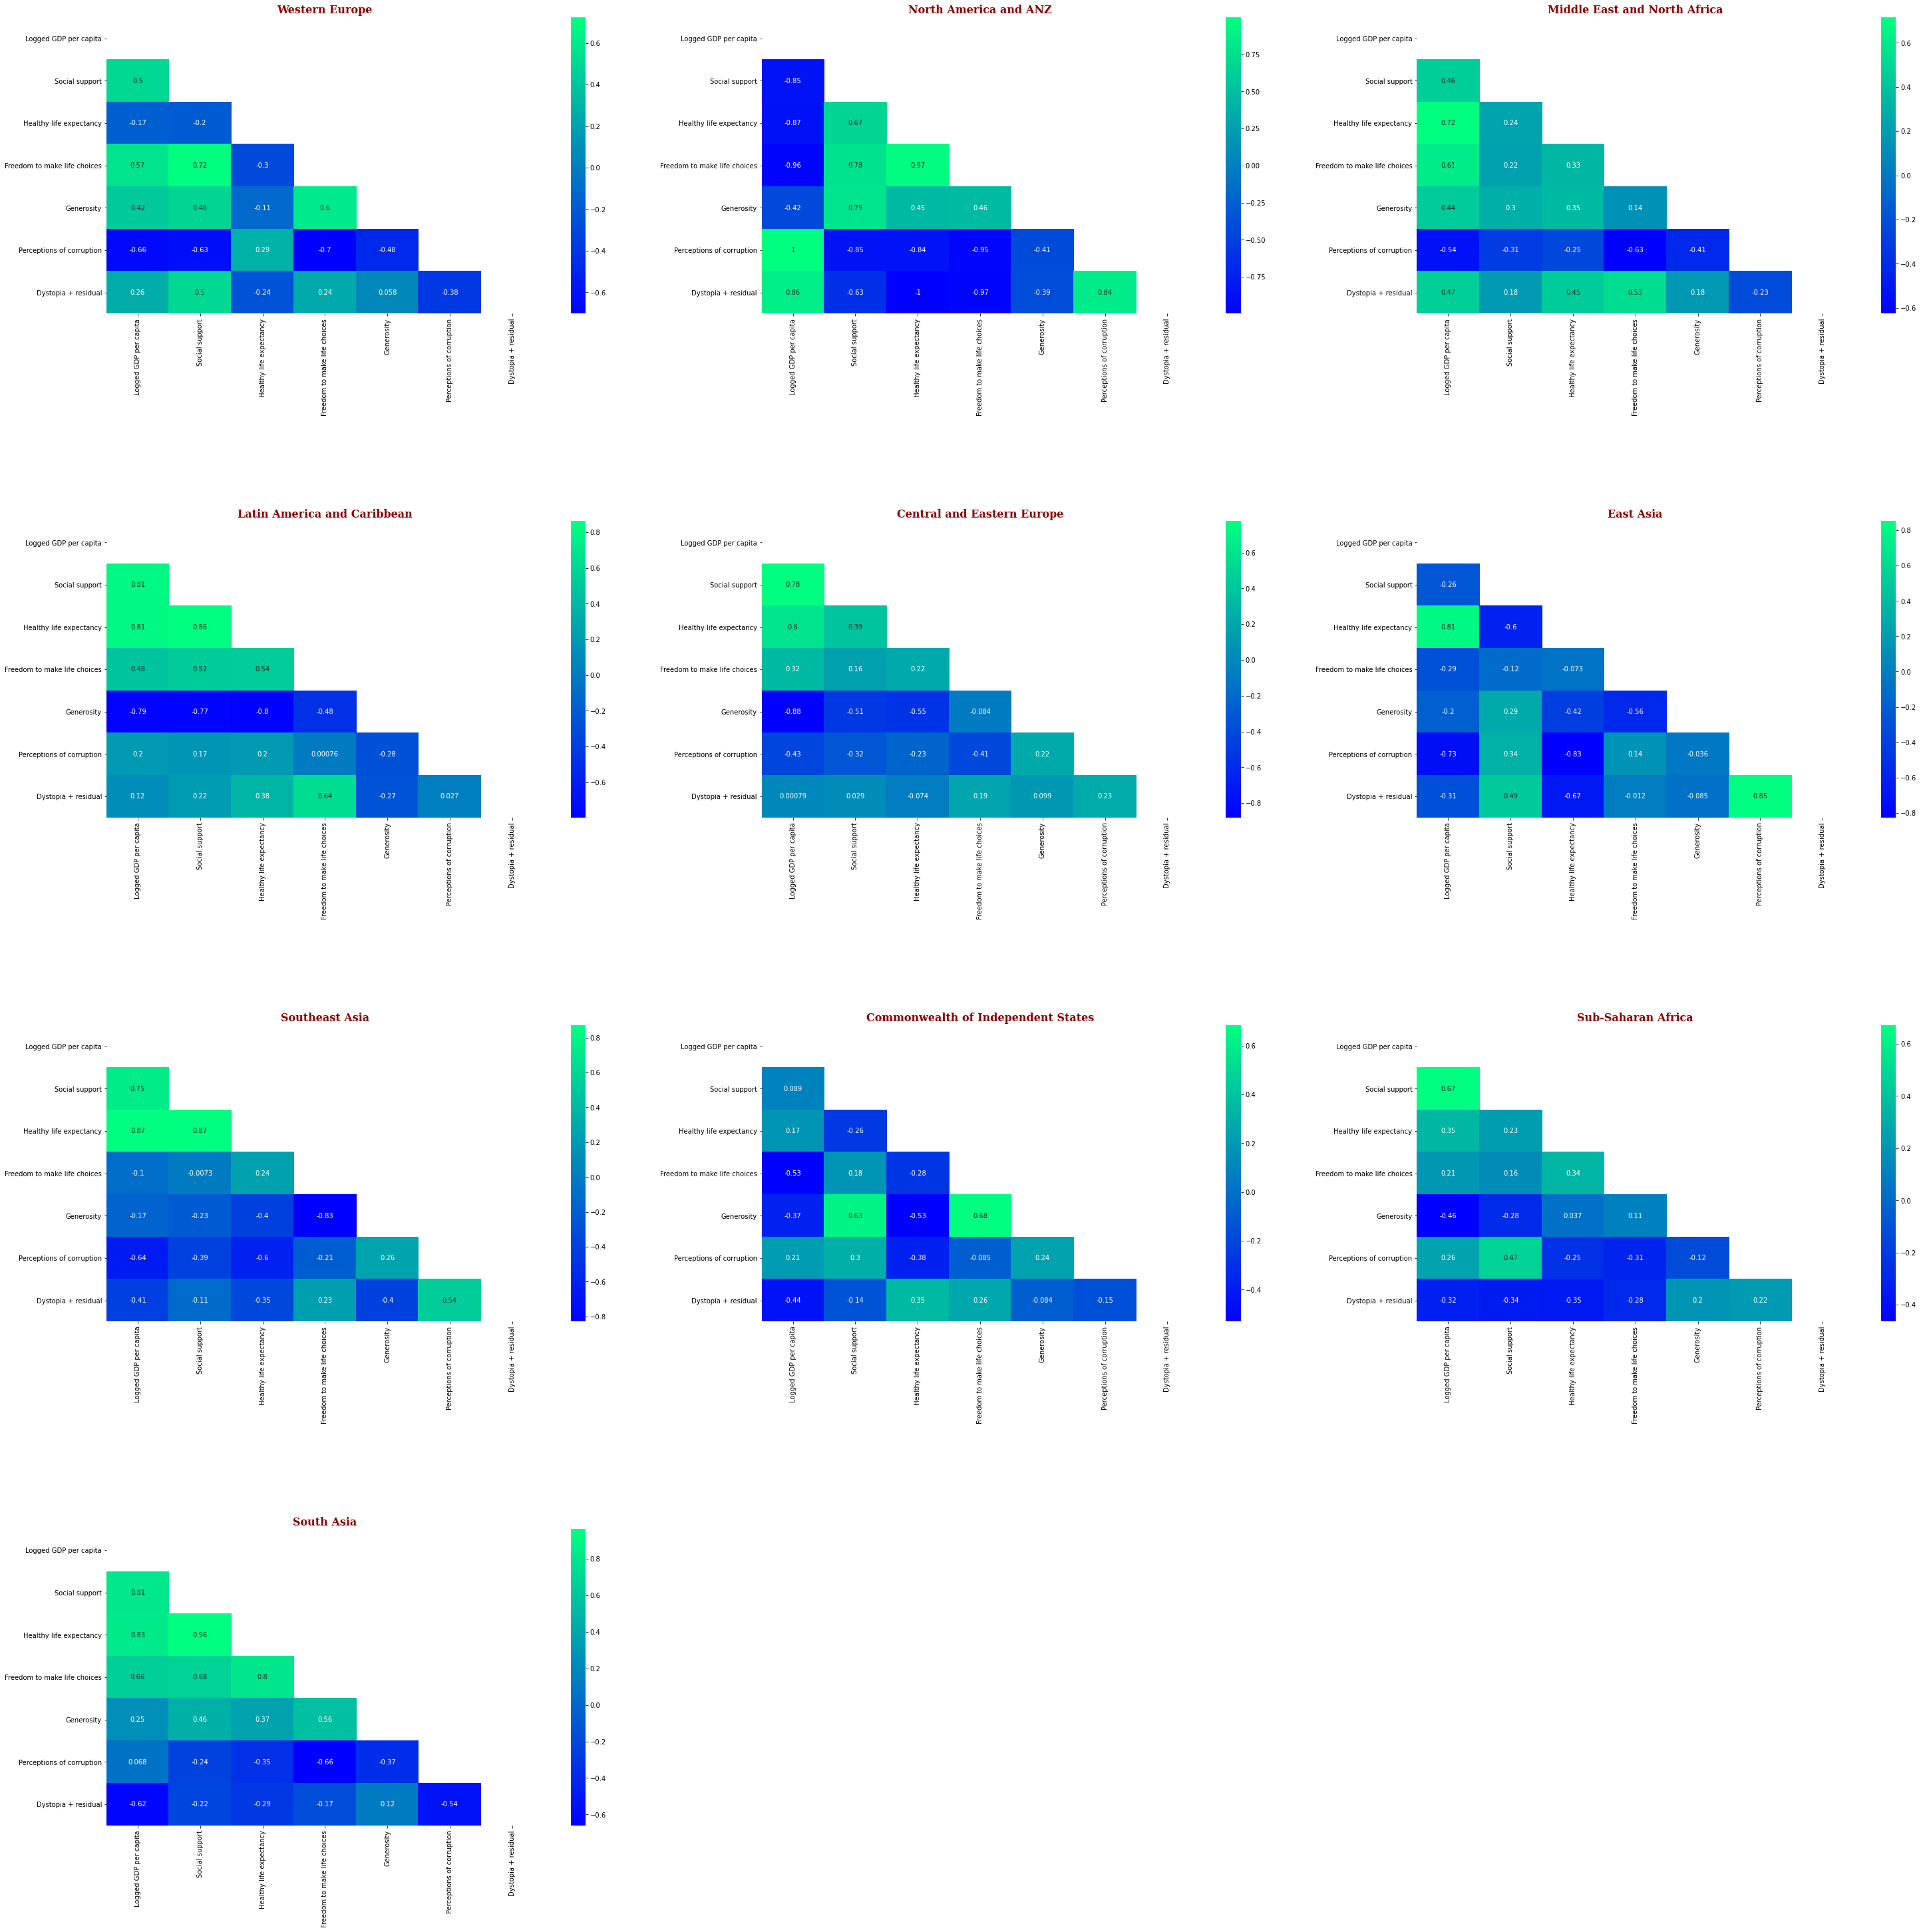

In [ ]:
#création d'une boucle pour créer les heatmaps en fonction des régions. On peut effectivement voir que le top3 des indicateurs les plus corrélés au LaderScore n'est pas le même en fonction des régions.


data_corr =pd.DataFrame(df[['Regional indicator','Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption','Dystopia + residual']])


corr_data_exp= data_corr.corr()

plt.subplots(figsize=(50, 50))

j=1

for i in range(len(data_corr["Regional indicator"].unique())):

  
  region = data_corr["Regional indicator"].unique()[i]

  data_map = data_corr[data_corr["Regional indicator"] == region]
  # Récupère le triangle du haut de la matrice de corrélation
  matrix = np.triu(corr_data_exp)
  corr_data_exp= data_map.corr()
  plt.subplot(4,3,j)
  sns.heatmap(corr_data_exp, annot=True, cmap='winter', mask=matrix)
  plt.subplots_adjust(hspace=0.7)
  plt.title(region, position=(0.5, -10),fontdict={'family': 'serif', 'color' : 'darkred','weight': 'bold','size': 16});
  j +=1
  if j==4:
    j==1
   

Ici, nous avons une heatmap découpée par région du monde. Les variables impactantes ne sont pas toujours les mêmes d”une région à l’autre, mettant ainsi en évidence la subjectivité des critères tout autant que la différence économique et sociale entre chaque région du monde.

In [ ]:
fig = px.pie(values = df.groupby('Regional indicator').count()['Country name'].sort_values().values, names = df.groupby('Regional indicator').count()
['Country name'].sort_values().index, title = 'Répartition des pays par "Regional indicator"', 
color_discrete_map = {'Sub-Saharan Africa':'#636EFA',
                    'Western Europe':'EF553B',
                    'Latin America and Caribbean':'00CC96',
                    'Middle East and North Africa':'19D3F3',
                    'Latin America and Caribbean':'FECB52',
                    'Commonwealth of Independent States':'FB0D0D',
                    'Southeast Asie':'1CFFCE',
                    'South Asia':'0D2A63',
                    'East Asia':'7F7F7F',
                    'North America and ANZ':'AF0038'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Comme indiqué en commentaire du boxplot précédent, l'étendue des variables constitutives du bonheur n'est pas la même d'une région du monde à l'autre. Cela s'explique notamment par l'important écart de nombre de pays au sein de chaque région. Ce graphique pie nous permet d'avoir une vue d'ensemble sur le nombre de pays par région du monde et donc leur poids.
L'Afrique Subsaharienne, l'Europe de l'ouest et l'Amérique latine + Caraïbes sont les régions les plus importantes qui représentent à elles trois 51.7% des pays. A contrario, l'Amérique du nord + Australie + Nouvelle-Zélande, l'Asie de l'est et l'Asie du sud ne représentent que 11.41% des pays, soit plus de quatre fois moins.

De 2005 à 2021

In [ ]:

#color_continuous_scale=[(3, "red"), (5, "yellow"), (7, "green")])

df2 = df2.sort_values('year')


fig = px.choropleth(df2,locations = 'Country name',locationmode = 'country names' ,color = 'Life Ladder', projection = 'equirectangular', scope = "world",
                    animation_frame = "year")
fig.update_layout(title = 'Score "bonheur" dans le monde')
fig.show()

# autre type de : projection = : 'orthographic' = globe rond qu'on peut tourner, 'natural earth' = à plat stylisé, 'conic equal area' = globe effet à plat,
# 'equirectangular' = rectangulaire
# changer vue : scope = 'world', 'usa', 'europe', 'asia', 'africa', 'north america', 'south america'
# changer de variable : color = 'choix de la variable"


Cette carte du monde interactive permet de switcher d'années en années, de 2005 à 2020, afin de se rendre compte d'un point de vue plus global, de la répartition des pays les plus heureux, les moins et les intermédiaires ainsi que leur évolution dans le temps. Chaque région du monde semble, à cette échelle, assez bien découpée en fonction du score de bonheur. Se démarquent ainsi l'Europe de l'ouest et l'Amérique du nord + Australie + Nouvelle-Zélande ayant un bon score, suivie par l'Amérique Latine + Caraïbes et Asie de l'est. Se démarquent également l'Asie du sud et l'Afrique Subsaharienne par des couleurs plus sombres, relatives à leur score de bonheur plus bas.

In [ ]:
#Pays ayant été dans le top 3 depuis 2005
df_full_top3 = df_full[df_full['rank'] <= 3].sort_values(by='year')

#Pays ayant été 1ers depuis 2005
df_full_top = df_full[df_full['rank'] == 1].sort_values(by='year')

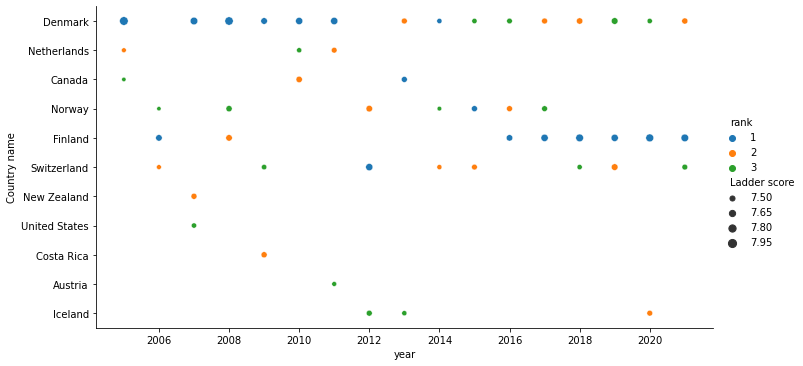

In [ ]:
#depuis 2005, 11 pays se disputent les 3 premières places. Leurs scores sont très proches, tous se trouvent dans un interval de 0.5pts en 17 ans. 
#La Finlande est 1ère depuis 2016, mais le Danemark est le pays le plus présent sur le podium (15 fois en 17 ans). Pays le plus stable? Que s'est-il passé en 2016 en Finlande?

ax = sns.relplot(x='year', y='Country name', hue='rank', size= 'Ladder score', height=5, aspect = 2, palette = 'tab10', data=df_full_top3);

Cinq pays se disputent la première place depuis 2005 ; le Danemark, la Finlande, la Suisse, le Canada et la Norvège. La Finlande a su se démarquer dès 2016 pour arriver en tête du classement. Également, depuis 2014, le top 4 est uniquement occupé par des pays d’Europe de l’ouest où la Finlande et le Danemark semblent être les pays les plus heureux.


In [ ]:
# les 5 pays qui se disputent la 1ère place depuis 2005

first_countries = ['Denmark', 'Finland', 'Switzerland', 'Canada', 'Norway']

df_full_first_countries = df_full[df_full['Country name'].isin(first_countries)]



<Figure size 1440x1440 with 0 Axes>

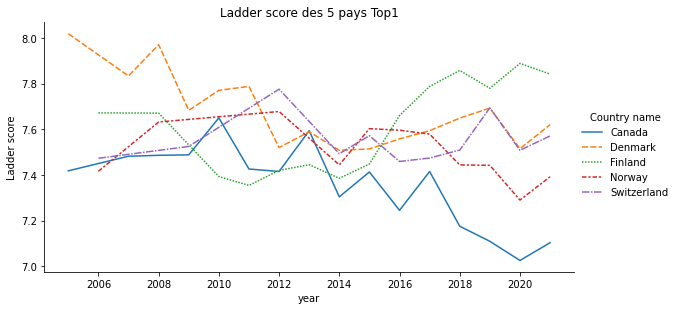

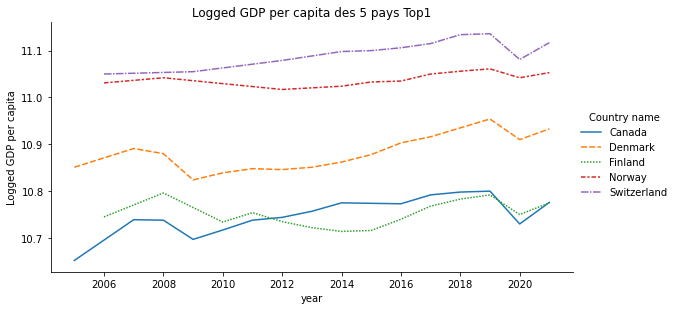

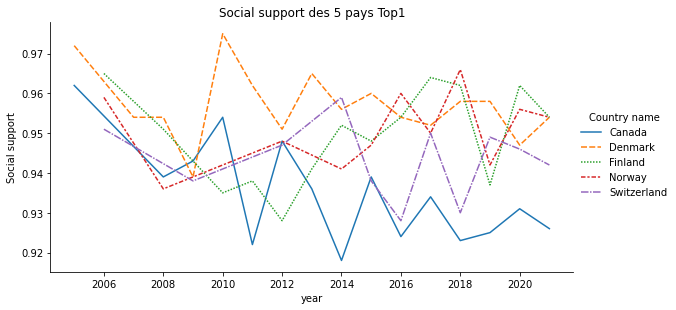

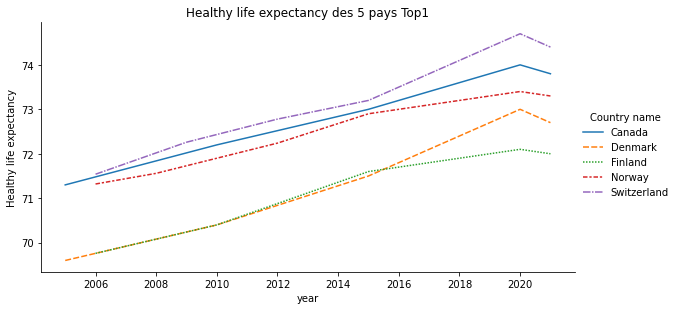

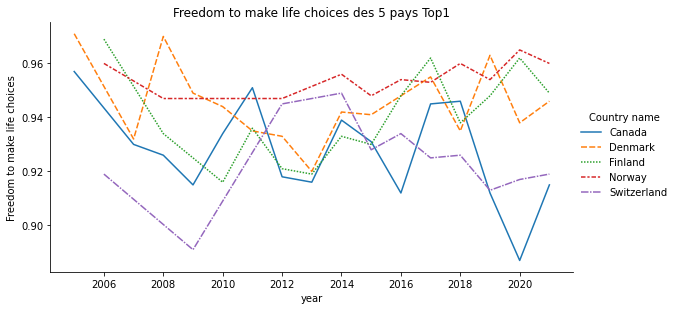

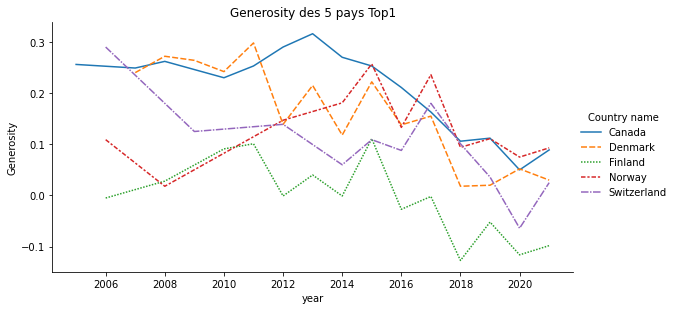

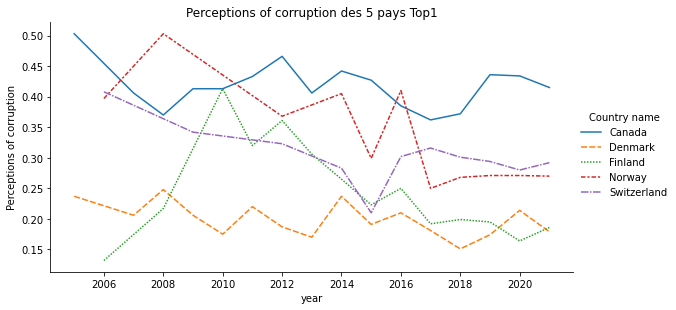

In [ ]:
liste_var = ('Ladder score','Logged GDP per capita', 'Social support','Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption')

plt.figure(figsize=(20,20))


for i in liste_var :

    sns.relplot(x='year', y=i, kind='line',hue='Country name', style='Country name', height=4, aspect = 2, data = df_full_first_countries).set(title=(i + ' des 5 pays Top1'));


Depuis six ans, la Finlande est en tête de ce classement alors que la Suisse présente de meilleurs résultats sur 2 des 3 variables les plus corrélées au Ladder score (PIB/habitant et espérance de vie). On peut facilement observer que pour chacun des cinq pays, les variables PIB/habitant et espérance de vie sont assez linéaires et augmentent d’années en années à l’exception de l’année 2020, marquée par la crise sanitaire qui perdure encore aujourd’hui. A l’inverse, les autres variables alternent entre rebond et rechute de façon cyclique. La générosité quant à elle, agit de même mais elle a tendance à diminuer d'années en années mais connaît un rebond récent.